## 강화학습 목표
- 강화학습의 목표는 모든 시점 $t$ 에서 누적 보상(return)의 기댓값을 최대화하는 최적 정책(optimal policy) $\pi_{*}$ 을 찾는 것
- 정책 $\pi$ 를 따랐을 때 시점 $t$ 에서의 상태 $S_t=s$ 로부터 얻을 수 있는 return $G_t$ 는 다음과 같이 정의됨.
- $G_t=R_{t}+γR_{t+1}+γ^2 R_{t+2} +... $ ,여기서 $\gamma$ 는 할인율(0에서 1사이)
- 최적 정책은 모든 상태 $s$ 에서 상태가치함수 $V_\pi(s)=E_\pi[G_t | S_t=s]$ 를 최대화하는 정책임.

#### 어려움 :
- 상태가치함수를 풀어서 써보면  $V_\pi(s)=E_\pi[G_t | S_t=s] = E_\pi[R_{t}+γR_{t+1}+γ^2 R_{t+2} +... | S_t=s]$
- 는 상태가 $t$ 시점에서 $s$ 로 주어졌다는 것 외에는 일반적으로 모두 확률적으로 움직임.
- 즉 $t$ 시점에서 보상 $R_t$ 는
    1. 상태 s가 주어졌을 때 에이전트의 정책 확률 $\pi(a|s)$ 을 따르고
    2. 행동이 주어졌을 때 다음 상태의 전이 확률 $ p(s'|s,a)$ 을 따르고
    3. 그때의 보상(결정적인 보상이라면)   $r(s,a,s')$가 나옴
- $R_t$ 하나 구하기에도 빡센 상황에서 $R_{t+1}, R_{t+2}, ..., $ 을 구하는 상황을 보면 상태가치함수가 매우 복잡한 함수라는 것을 알 수 있음.

### 
#### 해결책
#### 벨만 방정식 (Bellman Eqaution) :
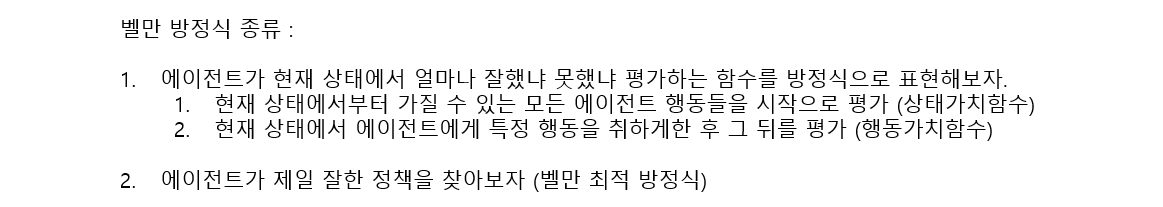
-  현재 상태의 가치 함수와 다음 상태의 가치 함수 사이의 관계를 나타내는 방정식으로 표현하여
- 복잡하게 정의된 가치 함수를 재귀적인 형태로 표현하여 계산하고 분석하는 것을 용이하게함

- 도입 이유 :   
    1. 재귀적 관계 정의: 
        - 현재 상태(또는 상태-행동 쌍)의 가치를 즉각적인 보상과 다음 상태(또는 상태-행동 쌍)의 가치로 연결하는 재귀적 관계를 제공  
    2. 문제 분해: 
        - 전체 강화학습 문제를 더 작고 다루기 쉬운 하위 문제로 분해해줌 
    3. 알고리즘의 기반: 
        - 동적 프로그래밍(Dynamic Programming), 시간차 학습(Temporal Difference Learning) 등 많은 강화학습 알고리즘의 이론적 기반이 됨

# 
### 3.1 벨만 방정식 도출
#### 3.1.1 확률과 기댓값(사전 준비)
- t 시점에서 상태 s 가 주어졌을 때 
    1. $a$ 라는 행동을 취할 확률 $\pi(a|s)$
    2. 특정 행동 $a$이 취해졌을 때 다음 상태 $s'$로 전이될 확률  $ p(s'|s,a)$ 
    3. 그러므로써 얻게되는 결정적 보상 $r(s,a,s')$
    4. 이상의 논의에서 행동과, 다음 상태가 2개의 확률변수로 나타나며 그에 대응하는 보상 값이 있는 경우를 두 확률변수로 얻어질 수 있는 보상의 기댓값으로 표현이 가능함.
    5. 즉 $E_{p(a,s')}[r(s,a,s')]=$ $\sum_{a}\sum_{s'}p(a|s)p(s'|s,a)r(s,a,s')$
    6. 이를 쉽게 눈으로 이해해보기 위해 다음과 같은 예시를 들여다보자

주사위의 확률과 기댓값 : (즉 확률변수 1개일때 기댓값)
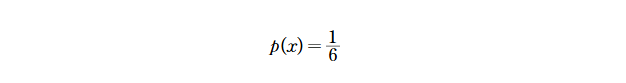
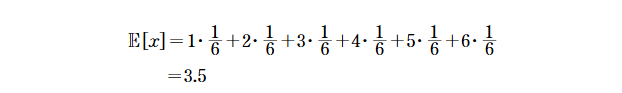
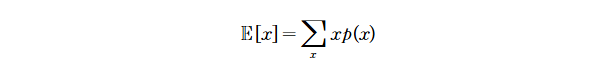

- 주사위를 먼저 던지고 이어서 동전을 던지는 방식을 보자.
    1. 주사위는 홀수냐 짝수냐로 나눠지고,
    2. 이후 홀수가 나오면 50% 확률인 동전을 던질 수 있고, 짝수가 나오면 앞면이 나올 확률이 80%인 동전을 던질 수 있음.
    3. 두 가지 동전의 경우 모두 앞면이 나오는 경우에는 주사위 눈 만큼의 보상이 얻어짐
    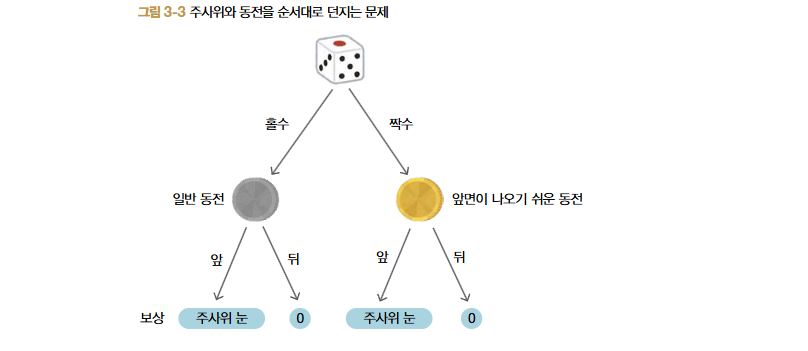
    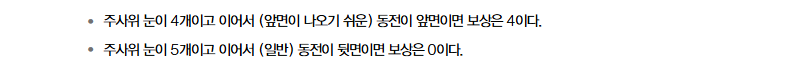

이 문제의 보상의 기댓값은 어떻게 구하는가?
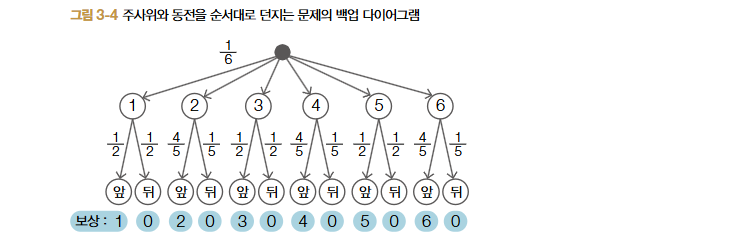
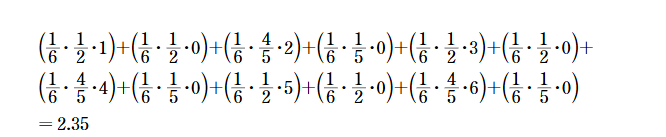

- 이제 이를 기호로 표현해보자
    1. 주사위의 눈을 $x$
    2. 동전의 결과(앞, 뒤)를 $y$ 로 표기
- 그리고 주사위의 눈이 어떻게 주어지느냐에 따라 동전의 결과 확률이 달라지므로 이는 조건부 확률임.
- $p(y|x)$ 로 표현하며 다음과 같음
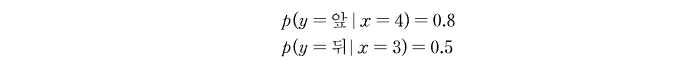

- 또한 동시에 일어날 확률은 다음과 같이 계산할 수 있음.
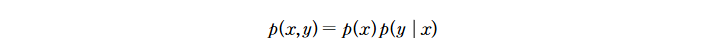

- 이번 문제에서 보상은 $x, y$에 의해서 결정됨. 보상을 함수 $\gamma(x,y)$로 나타낼 수 있음
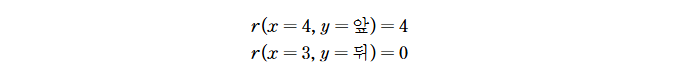

- 그럼 보상의 기댓값을 기호로 표현하면 다음과 같이 표기할 수 있음.
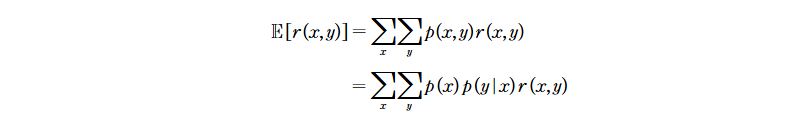
$E_{p(a,s')}[r(s,a,s')]=$ $\sum_{a}\sum_{s'}p(a|s)p(s'|s,a)r(s,a,s')$ 와 비슷한 꼴임.

# 
#### 3.1.2 벨만 방정식 도출
- 끝이 없는 미래 시점까지 나아가는 보상들의 합을 현재 상태와 미래 상태 2가지로 나누어 표현하여
- 무한히 뻗어나가는 것을 없앤 것처럼 표현하는 테크닉을 따라가볼 것임.
#### 벨만 방정식 도출에 필요한 테크닉 1. 
- t 시점에서의 수익 return 은 다음과 같이 정의됨.
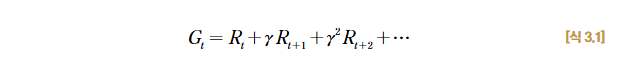
그리고 보상을 무한히 계속 받을 수 있는 지속적 과제라고 가정하자.

- t+1 시점에서의 return은 다음과 같이 표기됨.
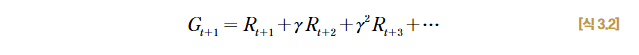

그렇다면 다음과 같이 표현할 수 있음.
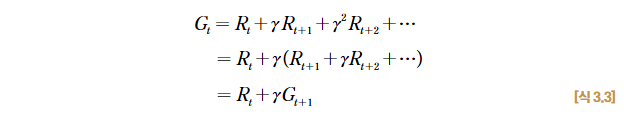
- t 시점의 return은
    1. t 시점의 보상과
    2. 미래 시점의 return 으로 표현됨.
- 또한 재귀적으로 표현할 수 있음
- $G_{t+1}= R_{t+1} +\gamma G_{t+2}$

### 
#### 벨만 방정식 도출에 필요한 테크닉 2.
이어서 $s$로 주어진 상태에서의 상태가치함수에 위 표현을 대입해보자
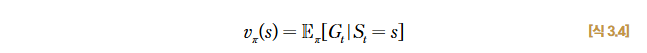
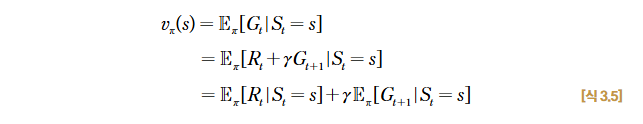

기댓값 $E[X+Y] = E[X] + E[Y]$ 로 분해될 수 있음. 선형성(Linearity)를 만족하기 때문

#### 1. 상태가치함수 첫 번째항 전개 : 

쉬운 예시를 통해 그림과 수식을 같이 보자.   
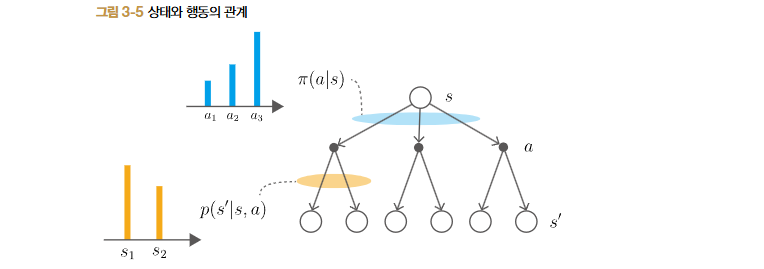
    1. 현재 상태가 s 이고 에이전트는 3가지 행동 중 하나를 확률적으로 선택함.
    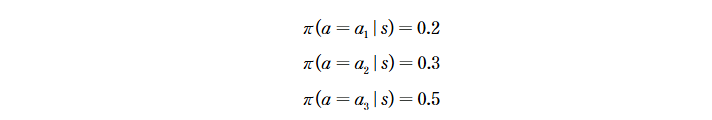
    2. 두 번째는 행동 $a_1$ 이 선택되었을 때 다음 전이되는 상태도 둘 중 하나로 확률적으로 선택됨.
    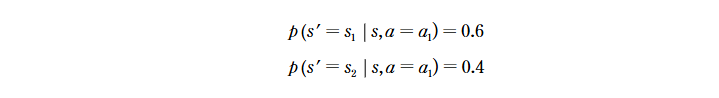
    3. 그리고 마지막으로 보상이 주어짐 

구체적인 예를 들어, 에이전트가 0.2 확률로 $a_1$ 행동을 하고 0.6 확률로 $s'=s_1$ 상태로 전이된다면 이 경우 얻게되는 보상은
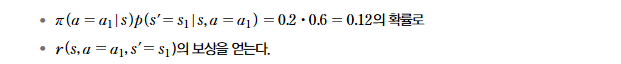

기댓값은 모든 가능성에 대해 계산하는 것이므로 가능한 행동 $a$ 와 가능한 다음 전이 상태 $s'$ 에 대해
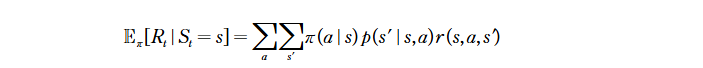
로 계산됨.

#### 문제 : 보상이 모든 전이 상태에 대해 1로 결정적으로 주어지고 각 행동에 대한 전이상태 확률이 60%, 40%로 동일하게 주어진다면, 상태 s가 주어졌을 때의 t 시점의 보상의 기댓값을 계산해보세요

### 

In [7]:
a_list = [0.2, 0.3, 0.5]
s_prime_list = [0.6, 0.4]

E_R = 0
for i in a_list:
    for j in s_prime_list:
        print("{} X {} = {}".format(i,j,i*j))
        E_R += (i * j * 1)
print("t 시점 보상의 기댓값 : ", E_R)

0.2 X 0.6 = 0.12
0.2 X 0.4 = 0.08000000000000002
0.3 X 0.6 = 0.18
0.3 X 0.4 = 0.12
0.5 X 0.6 = 0.3
0.5 X 0.4 = 0.2
t 시점 보상의 기댓값 :  1.0


### 두 번째 식에 들어가기앞서 매우 중요한 개념 : 정책 $\pi$ 를 정확히 이해하고 있는가?
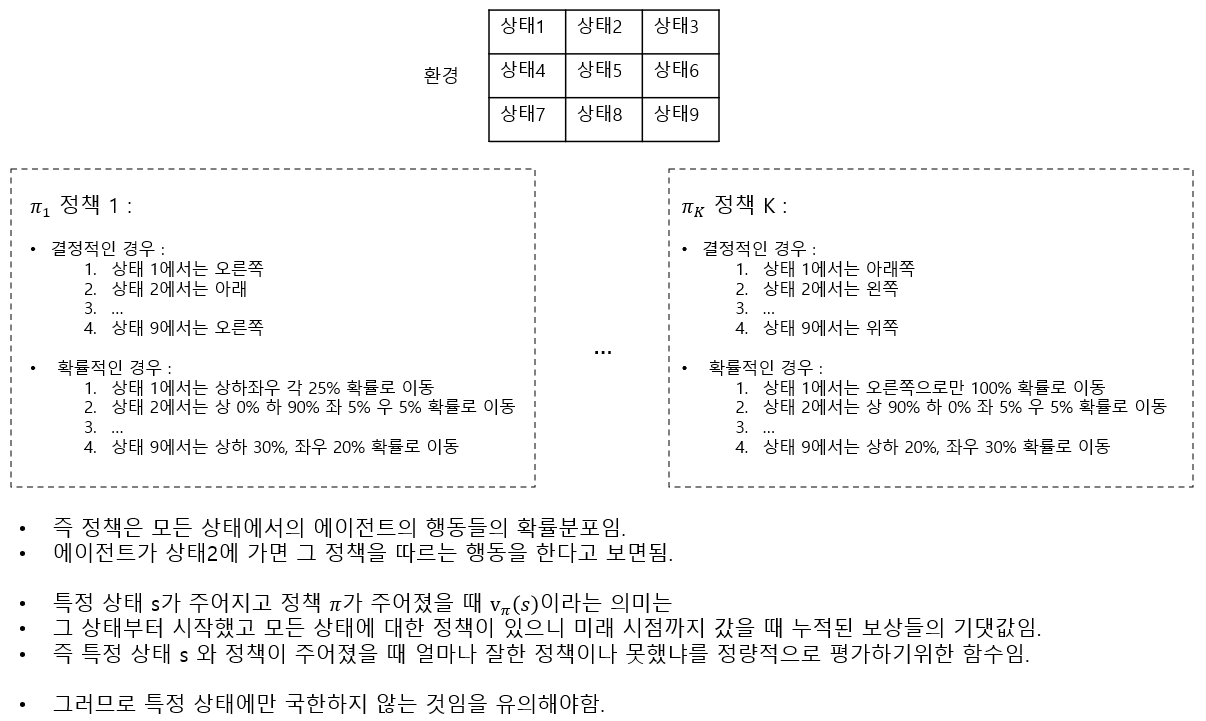

# 
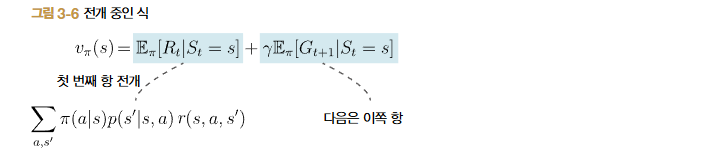
#### 2. 상태가치함수 두 번째식 전개 :
t 시점의 상태 s가 주어졌을 때 한 시점 뒤 미래인 t+1 시점에서의 수익(return)의 기댓값을 의미함
- 여기에 할인율이 곱해져있고
- t 시점에서의 정책 $\pi$ 가 있음

테크닉 1. 시간을 한 단위만큼 흘려보내서 해석해보는 것
- $S_t=s$ 를 $S_{t+1}=s$ 형태로 바꾸는 것

1. 구체적인 예로 에이전트의 현재 상태는 $S_t=s$ 로 주어짐.
2. 에이전트가 0.2 확률로 $a_1$ 을 선택하고, 0.6 확률로 다음 전이 상태 $S'=s_1$ 이 선택되었다고 해보자.
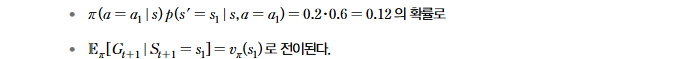
3. 그렇다면 다음 상태인 $S_{t+1}$은 $s_1$으로 주어지게됨., 그리고 $S_{t+1}$ 에서도 정책 $\pi$가 있음.
4. 그럼 다음 시점의 상태 $s_{t+1}=s_1$ 으로 주어진 상태에서의 다음 시점의 수익의 기댓값을 구하는 형태가됨.
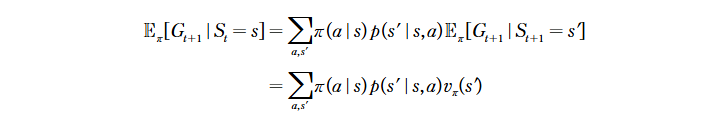
결과적으로 $s'$ 상태가 주어졌을 때 다시 상태가치함수로 재귀적으로 표현됨,
- 이때 주의해야하는 점은 정책 $\pi$는 $t$ 시점이라는 것에 유의.
- 또한 t+1 시점 이후에 

- t시점에서 s가 주어졌을 때 상태가치함수 $v_\pi(s)=E_\pi[G_t|S_t=s]$
- t+1 시점에서 s' 이 주어졌을 때 상태가치함수 $v_\pi(s')=E_\pi[G_{t+1}|S_{t+1}=s']$

# 
#### 드디어 벨만 방정식 유도 :
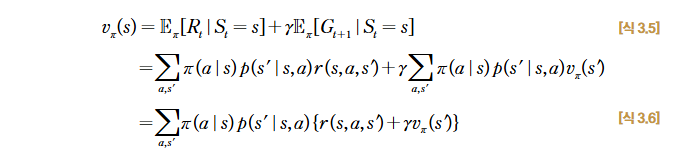
- 해석 : 
    1. 상태 s의 상태 가치 함수와 다음에 취할 수 있는 상태 $s'$ 의 상태 가치 함수의 관계를 나타낸 식
    2. 모든 상태 $s$ 와 모든 정책 $\pi$ 에 대해 성립

# 
#### 벨만 방정식에 대한 헷갈리는 개념에 대한 질문 : 
- 다시 위와 같이 벨만 방정식이 있을 때 $\pi$ 라는 정책은 모든 가능한 상태들이 있을 때 행동들의 확률분포인가?
- 즉 특정 상태 $s$로 주어져있을 때의 행동 확률분포 $\pi(a|s)$도 있지만, $\pi(a'|s')$ 다른 상태 $s' $이 주어졌을 때의 행동 확률분포 또한 포함하여 정책이라고 하는가?
- 그렇다면 $s$로 주어졌을 때의 상태가치함수$v_\pi(s) $에는 $s $로 주어진 경우에만에 해당하는 정책이라고 할 수 있는데 이는 다른 상태인 $s' $은 고려되지 않은 것 같은데 어떻게 해석해야하는가?

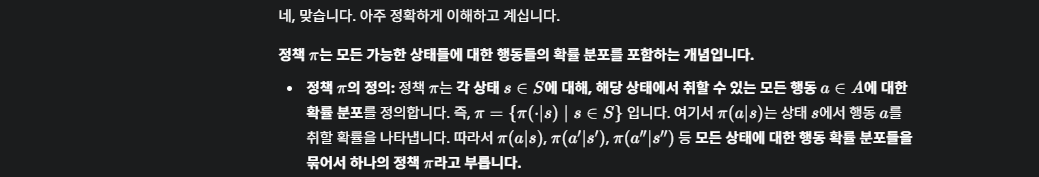
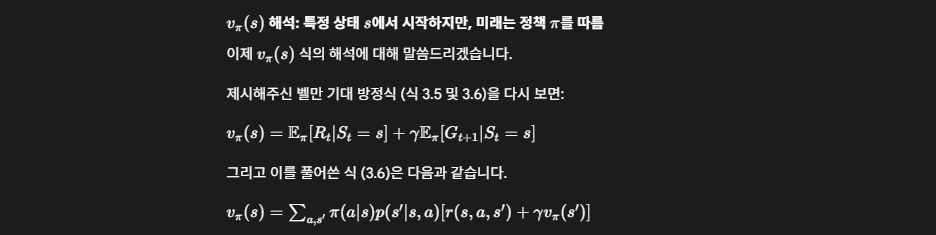
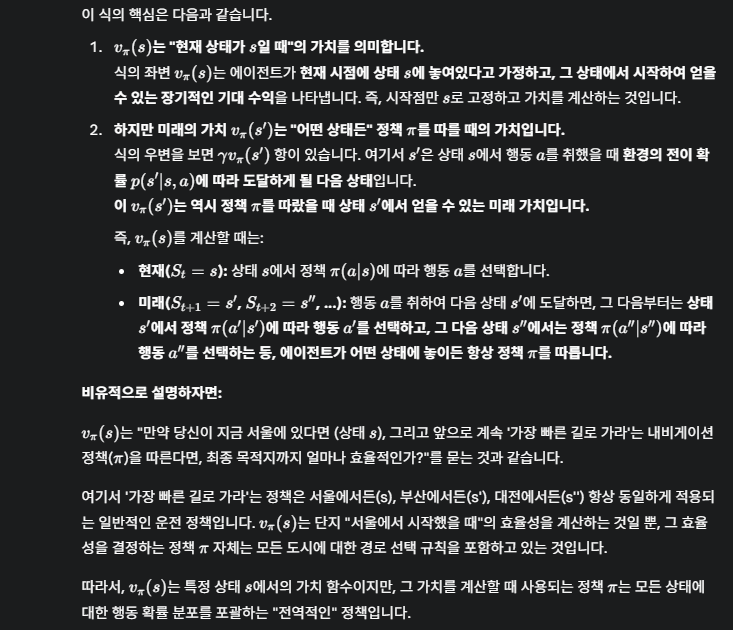

# 
# 
### 3.2 벨만 방정식의 예
이제 벨만 방정식을 사용하여 상태들이 주어졌을 때 직접 값을 넣어 계산하여 상태가치함수를 계산해보자

#### 3.2.1 두 칸짜리 그리드월드
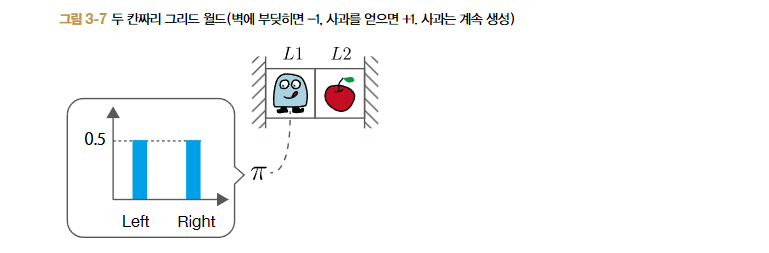

L1 의 상태에서 에이전트는 왼쪽, 오른쪽 각각 50% 확률로 움직인다고 해보자, 그렇다면 L1의 상태가치함수를 나타내면
- $v_\pi(L1)=E_\pi[G_t|S_t=L1]$
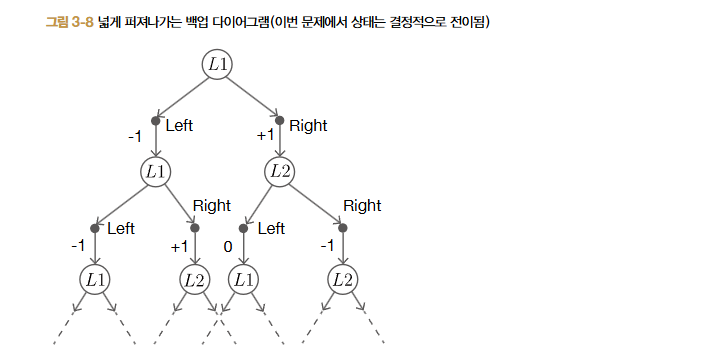

이제 벨만 방정식에 넣어 표현해보자
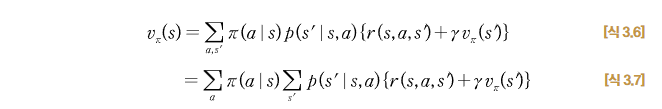

여기서 에이전트는 L1 상태에서 50% 확률로 확률적으로 움직이지만, 움직였을 때 전이되는 상태는 결정적임   
   
    - 즉 50% 확률로 왼쪽으로 움직였다면 다음 상태는 L1 상태로 확정적임.
    - 반대로 50% 확률로 오른쪽으로 움직였다면 다음 상태는 L2 상태로 확정적임.

그렇다면 $p(s'|s,a)$는 $s'$ 이 L1, L2 인 경우에는 1, 나머지는 0임.
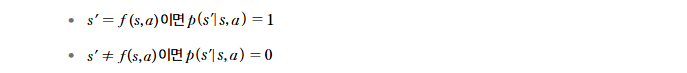
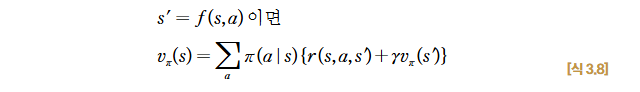
이를 표현한 백업 다이어그램은 
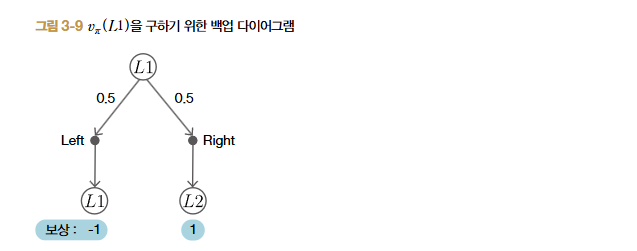

1. 이제 L1 상태에서 상태가치함수를 계산해보자. 먼저 $a$가 왼쪽으로 가는 행동이라면

- $\pi(a|s) = 0.5$
- $r(s,a,s') = -1$
- $S_{t+1}=s'=L1$

L1 상태에서 왼쪽으로 가는 행동을 할 경우 상태가치 : $0.5\{-1+0.9v_\pi(L1)\}$

이제 L1 상태에서 오른쪽으로 가는 행동을 할 경우 : $0.5\{1+0.9v_\pi(L2)\} $

그리고 정리해보면 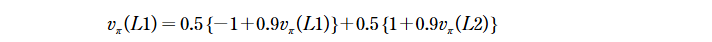
우항으로 정리하면
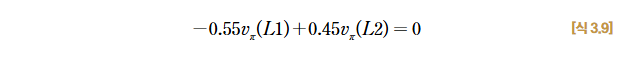

#### 
2. L2 상태에서 상태가치함수 계산
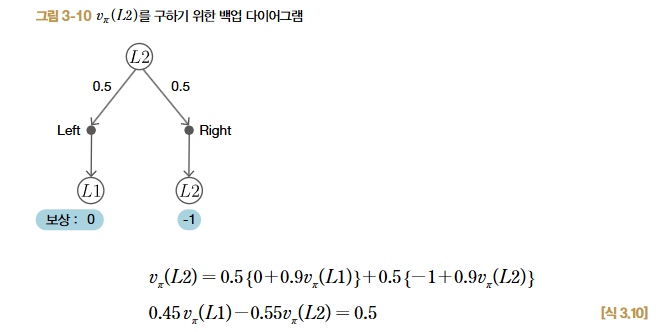

이제 L1과 L2 상태에서의 상태가치함수를 연립방정식으로 나열해보면 
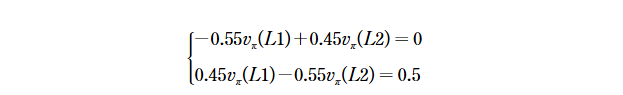

- 즉 지금은 아래와 같이 두 가지 상태(L1, L2 상태) 만 존재함
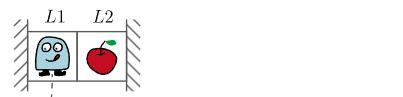
    1. 그러므로 두 가지 상태일 때 정책 $\pi$ 를 따르는 상태가치함수 $v_\pi(s=L1), v_\pi(s=L2)$ 를 알고싶음.   
    (에이전트가 각 상태마다 이런 행동을 하게된다면 미래 시점까지 고려했을 때 얼만큼 잘했는가를 수치로 표현하고자하는 문제임)
    2. 즉 $v_\pi(s=L1), v_\pi(s=L2)$  이 두 가지가 알고싶은 변수임.
    3. 그리고 벨만 방정식에 의해 위와 같은 연립방정식으로 유도됨.
    4. 유도된 연립방정식을 풀면 다음과 같음 해가 구해짐
    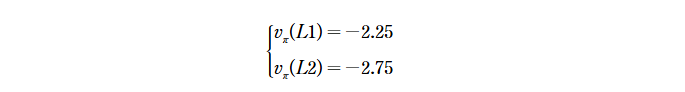

#### 3.2.2 벨만 방정식 의미
- 위 예시로 해석해보면
    1. L1 과 L2 상태가 있고 각 상태에서 왼쪽이냐, 오른쪽이냐 50% 확률로 가는 행동을 하는 정책을 수행한다면
    2. 끝이 없는 미래 시점까지 반영한 누적 보상인 수익이 얼마인가를 물어보는 것이고
    3. 이를 한 단계만 풀어보면 끝이 없는 미래 시점이 유한한 연립방정식으로 표현되어 풀 수 있게되었다고 할 수 있음.
    4. 그리고 그 값으로 L1 상태는 -2.25 를 나타내고, L2 는 -2.75 를 나타냄.

- 벨만 방정식은
    1. 끝이 없는 미래 시점들의 누적 보상을 유한한 연립방정식으로 전개하여 푸는 방법임.
    2. 끝이 없어서 각 상태에서의 수익을 못구할 것 같지만 계산할 수 있다는 의미.
    3. 또한 각 상태에서의 행동이 확률적이어도 풀 수 있음을 시사 -> 기댓값을 취해

# 
# 
### 3.3 행동 가치 함수(Q 함수)와 벨만 방정식
#### 3.3.1 
- 먼저 상태 가치 함수는 상태 $s$ 와 정책 $\pi$ 가 주어진 상태를 의미함.
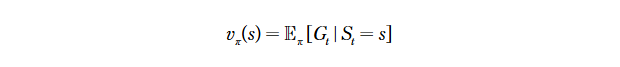
- 행동 가치 함수는 상태 가치 함수에서 상태 $s$ 에서 행동 $a$ 를 특정적으로 주는 경우를 의미함.
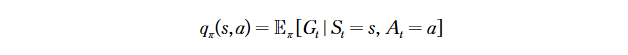
1. t 시점에서 행동 $a$ 를 취하고 t+1 시점부터는 다시 정책 $\pi$ 를 따르는 경우임.
2. 이때 얻을 수 있는 기대 수익이 $q_\pi(s,a)$ 임.
- 즉, 현재 상태에서 행동은 내가 결정할 수 있는 경우, 그 행동을 하게됨으로써 미래들에 대한 누적보상이 어떤가를 측정하는 함수임.
- 현재 상태에서 행동 $a$ 는 정책 $\pi$ 와 무관하다는 것에 유의
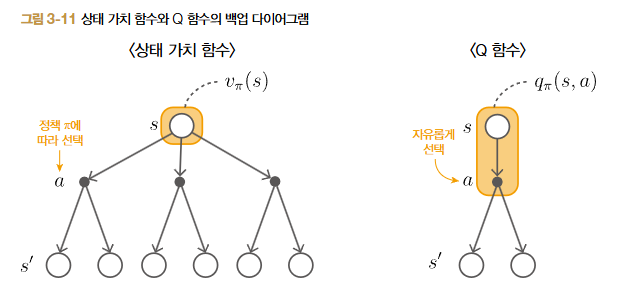

1. $q_\pi(s,a)$ 를 행동가치함수(action value function) 라고 하고 관례적으로 Q 함수(Q function)이라함.
2. 상태가치함수는 줄여서 가치함수 라고 칭함.

## 
#### 상태가치함수와 행동가치함수의 관계
- 행동가치함수는 특정 행동 $a$ 를 한 것이므로 현재 상태에서 모든 행동들에 대해 확률의 합으로 구하면 그것이 상태가치함수임.
- 예를 들어 상태 $s$ 에서 취할 수 있는 행동 후보 $\{a_1, a_2, a_3\}$ 가 있다고 해보면
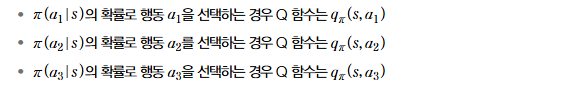
- $\pi(a_1|s)$ 는 s 상태에서 $a_1$ 을 행동할 확률
- $q_\pi(s,a_1)$ 은 s 상태에서 $a_1$ 행동을 했을 때의 가치 함수

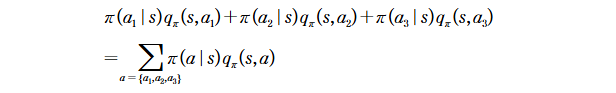
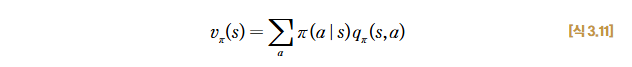

# 
#### 3.3.2 행동 가치 함수를 이용한 벨만 방정식 유도
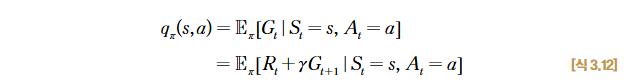

s 상태에서 a 행동을 확률(정책) $\pi(a|s)$ 이 없으므로

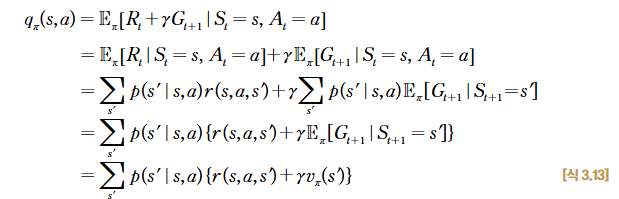

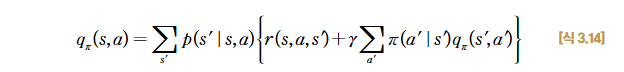

s 상태에서 특정 행동 $a$ 를 했을 때의 그시점 보상 $r(s,a,s')$ 과 $t+1$ 시점의 상태가치함수의 합

# 
# 
### 3.4 벨만 최적 방정식 (bellman optimality equation)
에이전트가 모든 상태에서 개쩌는 행동만 취하는 것들의 모임
- 벨만 방정식은 정책 $\pi$ 가 주어지면 성립하는 방정식임.
- 우리 목적은 정책 $\pi$ 가 가치가 얼마에요 정도가 아니라
- 가장 좋은 정책을 찾고 싶은 것임. 그래야 에이전트가 그 정책에 따라 행동할 것이므로

#### 3.4.1 상태 가치 함수에서 벨만 최적 방정식
먼저 상태가치함수에 대한 벨만 방정식 전개 후 거기에 최적 정책 $\pi_{*}$ 가 있다고해보고 집어 넣어보자.
- 상태가치함수의 벨만 방정식
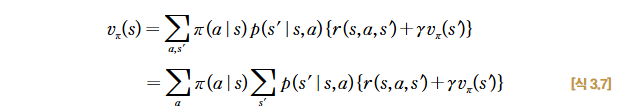

- 최적 정책 $\pi_{*}$ 을 대입한 상태가치함수의 벨만 방정식   
현재 상태 $s$ 뿐만 아니라 다음 상태들에 대해서도 최적 정책이라는 것에 주의
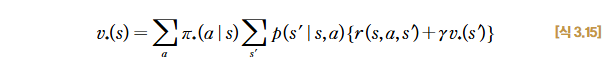

이제 어떤 정책을 펼쳐야 가장 좋은 정책이라고 할 수 있는가?   

당연히 상태가치함수 값이 큰 것이 좋음. 예를 들어 아래와 같이 3가지 행동에 대해 미래시점까지 누적보상 기댓값을 안다고해보자.
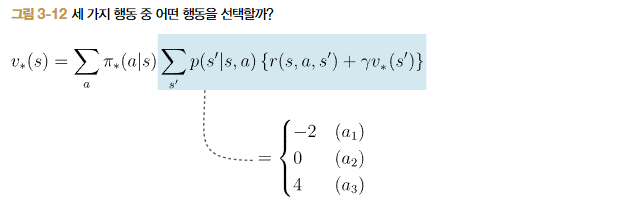
그렇다면 볼 것도 없이 $a_3$ 라는 행동에 100% 확률을 부여하여 $\pi_{*}(a|s)=\pi(a_3|s)=1$

그리고 $v_{*}(s)=4$ 이고 정책이 $a_3$ 만 고르는 결정적인 행동이라고 볼 수 있음.

이를 다시 표현해보면 상태 s에서 행동들 $a_1, a_2, ... $ 가 있을텐데 이 중에서 위에 파란색 박스를 가장 크게 만드는 행동 하나를 선택한다는 의미임.

이를 수식으로 표현하면 아래와 같음, 이것이 벨만 최정 방정식임

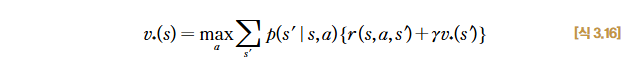

# 
#### 3.4.2 행동가치함수에서 벨만 최적방정식
이도 마찬가지로 먼저 행동가치함수의 벨만 방정식 전개 후, 최적 정책 $\pi_{*}$ 을 대입해볼 것임.

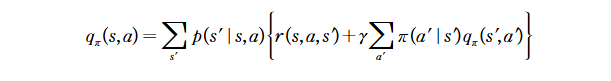

행동가치함수는 s 상태에서 행동 $a$는 이미 주어진 것이므로 상수값으로 받아들이고 시작하는 것임

그러므로 최적 정책 $\pi_*$ 는 다음 상태에서만 표현됨.
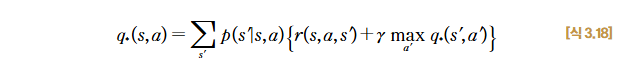
즉 $max$ 부분이 다음 상태가치함수에 가있는 것으로 차이가 있음.

#### 
#### Note
- MDP에서는 특정 상태에서 반드시 하나의 행동만 하는 결정적 최적 정책이 하나 이상 존재함.
- 최적 정책이 여러 개일 수 있으나 모두 같은 가치 함수값을 취함.
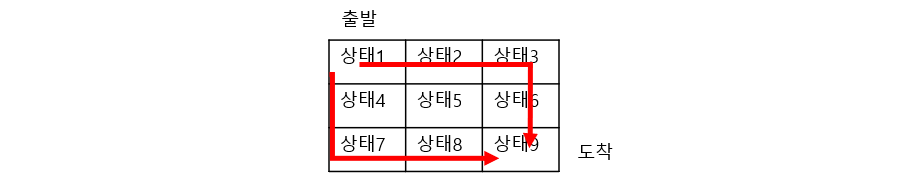

# 
# 
### 3.5 벨만 최적 방정식 예
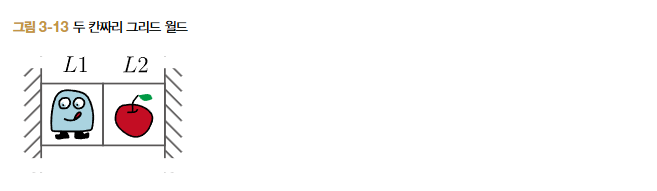
1. L1 에서 L2 로 이동하면 +1
2. 벽에 부딪히면 -1
3. 사과는 먹고 벗어나면 계속 생성
4. 그리고 상태 전이는 결정적임. 즉 L1 에서 L2 로 이동하면 무조건 이동하는 것임.
5. 할인율은 0.9

#### 3.5.1 벨만 최적 방정식 응용
아래와 같은 벨만 최적 방정식을 사용하여 2칸 그리드월드의 가장 개쩌는 정책을 찾아보자
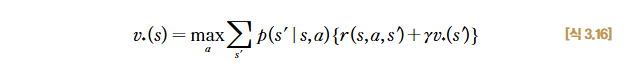

상태 전이가 결정적이라고 했으므로 
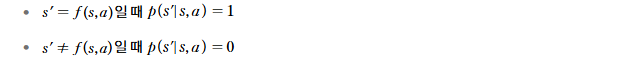
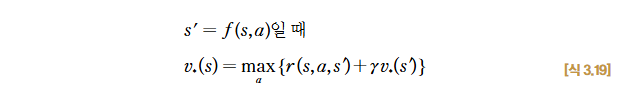

참고로 L1 과 L2 상태에서 시작했을 때 행동들을 백업 다이어그램으로 표현하면 다음과 같음
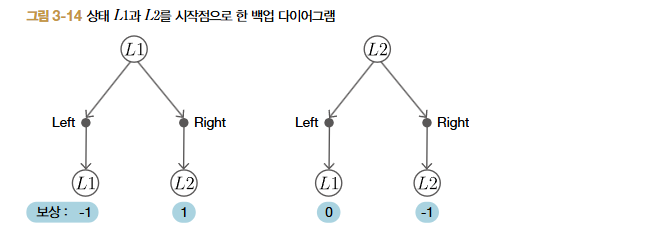

그렇다면 벨만 최적 방정식에 한 번씩 간 값을 넣어 대입하면
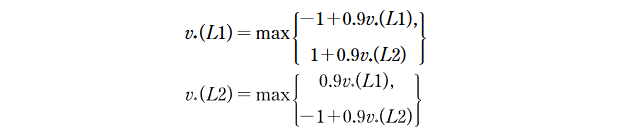

$max\{a,b\} $ 연산자는 a,b 중 가장 큰 값을 반환하는 연산자

그리고 정답은 다음과 같음. 그렇다면? 이 방정식은 어떻게 계산해야하는가?
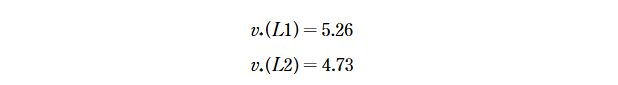

#### 질문 :
1. 벨만 방정식에서 무한히 재귀적으로 반복되는 식을 연립방정식으로 변환한 것을 이해하고 있는가?
2. 벨만 방정식은 상태전이확률, 에이전트 전략, 보상을 모두 알아야 풀 수 있는가?
3. 벨만 방정식과 벨만 최적 방정식은 어떤 차이점이 있는가? 그 둘의 목적이 무엇인가?
4. 벨만 최적 방정식은 비선형 연립방정식에 해당하는가?

# 
#### 3.5.2 최적 정책 구하기
이번에는 최적 행동 가치 함수 $q_*(s,a) $ 를 안다고 가정해보자, 그렇다면 상태 $s$에서 최적 행동은 다음과 같이 구할 수 있음.
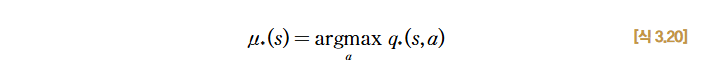

argmax 함수는 최댓값이 아니라 최댓값을 만들어내는 인수 $a$ 를 반환하는 함수임.

행동가치함수는 이미 상태 $s$에서 행동 $a$ 가 주어진 경우이므로 아래와 같이 표현할 수 있음을 배웠음.
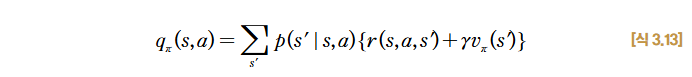

위 식 3.13에 3.20을 대입하면 다음과 같이 표현가능
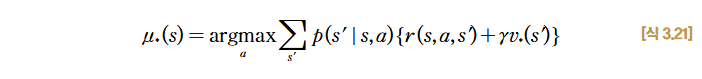

이제 위 식을 사용하여 2칸 짜리 그리드월드를 풀어보자, 앞서 구했던 최적 상태 가치함수는 아래와 같음
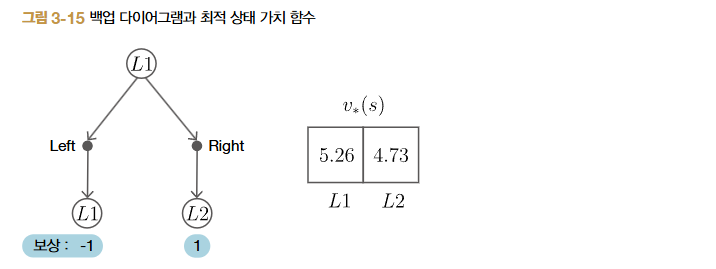
상태 $s$ 에서 왼쪽, 오른쪽 행동 2가지에 대한 최적 행동 가치 함수 값을 계산할 수 있으며 식 3.21에 대입하면 다음과 같이 계산되어짐.

L1 으로 행동하는 경우
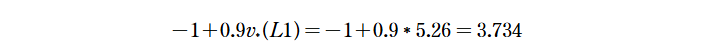
L2 으로 행동하는 경우
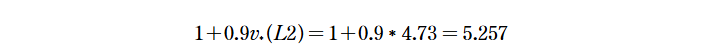

즉, L1 상태에서 행동 a를 L2(오른쪽)으로 이동하는 에이전트의 행동이 왼쪽보다 좋다는 뜻

#### 문제 : L2 상태에서 최적 행동 가치 함수를 계산해보자

결과 : 
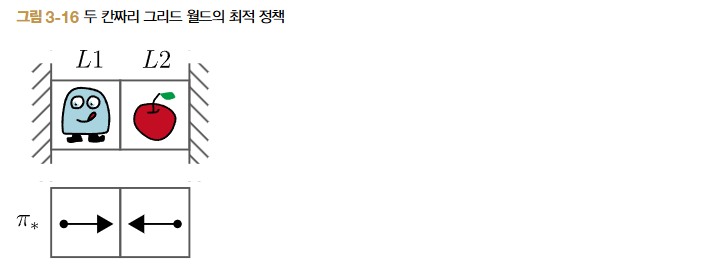

# 
# 
### 정리

1. 인공지능 학습 방법 중 강화학습
2. 강화학습은 에이전트와 환경의 상호작용으로 개념화
3. 행동(action), 상태(state), 보상(reward) 에 대한 수학적 모델링(함수)이 MDP
4. 에이전트의 제일 좋은 정책을 찾는 것이 목표(이를 수익 이라고 함)
5. 이제 MDP로 모델링되었는데 재귀적이어서 이를 연립방정식으로 변환하여 풀 수 있게한 것이 벨만 방정식

- 그리고 벨만 방정식은
    1. 특정 정책이 주어졌을 때 얼마나 좋은가를 측정하는 방법 ( 벨만 방정식 )   
        1-1. 현재 상태는 주어지고, 행동이 확률적으로 주어지는 경우   
        1-2. 현재 상태와 그 상태에서의 특정 행동이 주어졌을 때의 경우
        
    2. 최고로 좋은 정책 어떻게 구하는가? (벨만 최적 방정식)
        - max로 정의하고 비선형 연립 방정식임.

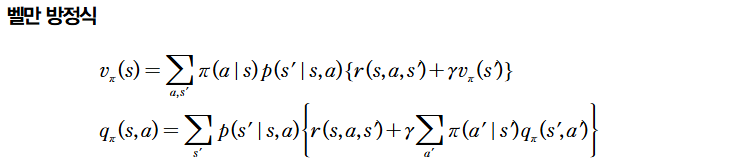
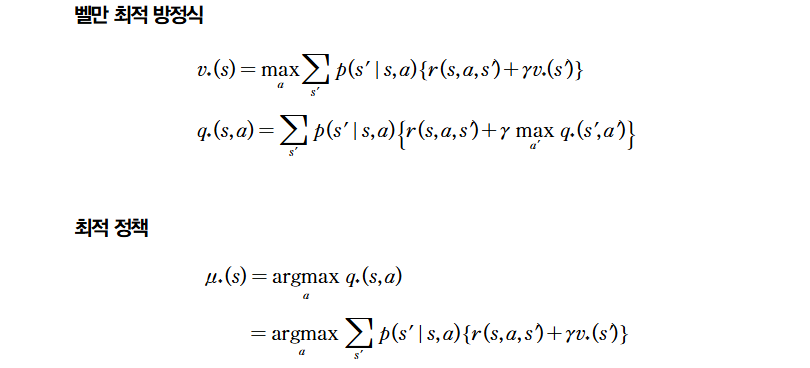